In [108]:
import os
import gzip
import numpy as np
from matplotlib import pyplot as plt

In [109]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [110]:
def load_FashionMNIST(data_path):
    Xtrn, Ytrn = load_mnist(data_path, "train")
    Xtst, Ytst = load_mnist(data_path, "t10k")
    return Xtrn.astype(np.float), Ytrn, Xtst.astype(np.float), Ytst

def load_CoVoST2(data_path):
    data = np.load(data_path+'/speech_trn.npz', allow_pickle=True)
    Xtrn, Ytrn = data['Xtrn'], data['Ytrn']
    data = np.load(data_path+'/speech_tst.npz', allow_pickle=True)
    Xtst, Ytst = data['Xtst'], data['Ytst']
    return Xtrn, Ytrn, Xtst, Ytst

In [111]:
datapath = os.path.join(os.getcwd())
datapath

'/Users/Hoffmann/Downloads/iaml-cw2'

In [112]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(datapath)

In [113]:
Xtst.shape

(10000, 784)

In [114]:
len(Ytst)

10000

In [115]:
Xtst[:2,50:90]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 137., 239., 252., 243., 234., 229., 238., 244., 246., 240.,
        230., 232., 239., 248., 251., 194.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 102.]])

In [116]:
Ytst[:2]

array([9, 2], dtype=uint8)

In [117]:
from copy import deepcopy

In [118]:
Xtrn_orig = deepcopy(Xtrn)
Xtst_orig = deepcopy(Xtst)

In [119]:
np.array_equal(Xtrn_orig, Xtrn*255.0)

False

In [120]:
Xtrn = Xtrn/255.0
Xtst = Xtst/255.0

In [121]:
Xmean_trn = np.mean(Xtrn, axis=0)

In [122]:
Xmean_trn[:3]

array([3.13725490e-06, 2.26797386e-05, 1.17973856e-04])

In [123]:
Xmean_tst = np.mean(Xtst, axis=0)

In [124]:
Xmean_tst[:3]

array([2.35294118e-06, 4.00000000e-05, 2.38823529e-04])

In [125]:
Xtst_nm = Xtst - Xmean_tst

In [126]:
Xtrn_nm = Xtrn - Xmean_trn

In [127]:
Xtrn_nm[0,:4]

array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04])

In [128]:
Xtrn_nm[-1,:4]

array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04])

In [129]:
Ytrn_cat = np.zeros(len(Ytrn))

In [130]:
for i in range(len(Ytrn)):
    Ytrn_cat[i] = Ytrn[i]+1

In [131]:
Ytst_cat = np.zeros(len(Ytst))

In [132]:
for i in range(len(Ytst)):
    Ytst_cat[i] = Ytst[i]+1

In [133]:
Xtrn_1 = Xtrn[Ytrn_cat == 1]

In [134]:
Xtrn_1_mean = np.mean(Xtrn_1, axis=0)

In [135]:
Xtrn_1_mean[:3]

array([5.22875817e-06, 7.64705882e-05, 5.79084967e-04])

In [136]:
dists_1 = np.zeros(len(Xtrn_1))

In [137]:
for i in range(len(Xtrn_1)):
    dists_1[i] = np.linalg.norm(Xtrn_1[i]-Xtrn_1_mean, ord=2)

In [138]:
dists_1[np.argmax(dists_1)] = -1

In [139]:
dists_1[np.argmax(dists_1)]

14.690609194332406

In [140]:
dists_1[5093] = np.inf
dists_1[1971] = np.inf

In [141]:
dists_1[np.argmin(dists_1)] = np.inf

In [142]:
np.argmin(dists_1)

2551

In [143]:
dists_1[np.argmin(dists_1)]

2.622369225287841

In [144]:
img_samples = np.zeros((50,784))

In [145]:
for i in range(10):
    Xc = Xtrn[Ytrn_cat == (i+1)] # get the class samples
    mean = np.mean(Xc, axis=0) # compute mean
    dists = np.zeros(len(Xc))
    for j in range(len(Xc)):
        dists[j] = np.linalg.norm(Xc[j]-mean, ord=2)
    Xn = Xc[np.argmin(dists)]
    Xf = Xc[np.argmax(dists)]
    c, d = np.argmin(dists), np.argmax(dists)
    dists[d] = -1
    Xsf = Xc[np.argmax(dists)]
    dists[d] = np.inf
    dists[c] = np.inf
    Xsn = Xc[np.argmin(dists)]
    img_samples[5*i+0] = mean
    img_samples[5*i+1] = Xn
    img_samples[5*i+2] = Xsn
    img_samples[5*i+3] = Xsf
    img_samples[5*i+4] = Xf

In [146]:
np.array_equal(Xtrn_1[2551], img_samples[2])
#Xtrn_1[5093] furthest
#Xtrn_1[1971] s furthest
#Xtrn_1[5993] closest
#Xtrn_1[2551] s closest

True

In [147]:
img_samples_grayscale = np.zeros((50,28,28))

In [148]:
for i in range(50):
    img_samples_grayscale[i] = np.reshape(img_samples[i], (28,28))

In [149]:
def get_sample_num(X):
    for i in range(len(Xtrn)):
        if (np.array_equal(Xtrn[i], X)):
            return i
        else:
            continue
    return -1

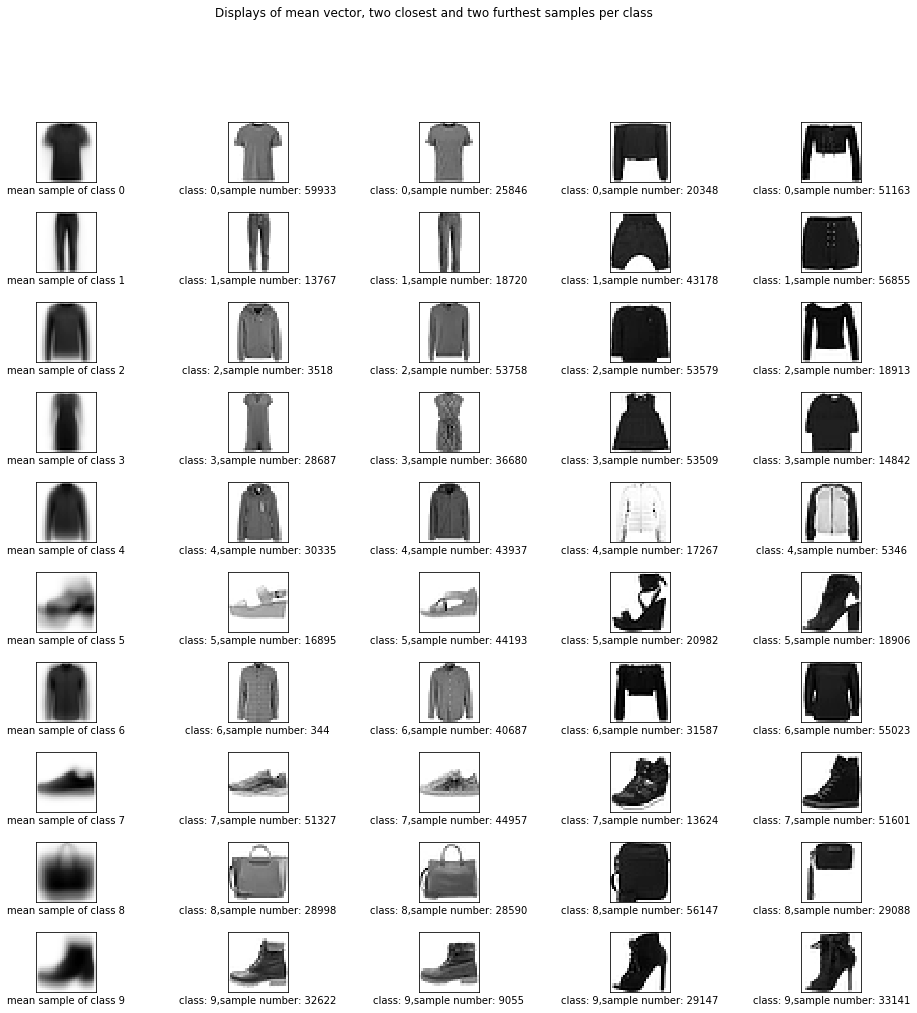

In [150]:
fig, axs = plt.subplots(10,5, figsize=(16,16), sharey=True, sharex=True, subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.5, wspace=0.5))
fig.suptitle('Displays of mean vector, two closest and two furthest samples per class')
for i in range(10):
    axs[i,0].imshow(img_samples_grayscale[5*i], cmap=plt.get_cmap('gray_r'))
    axs[i,0].set(xlabel='mean sample of class '+str(i))
    axs[i,1].imshow(img_samples_grayscale[5*i+1], cmap=plt.get_cmap('gray_r'))
    axs[i,1].set(xlabel='class: '+str(i)+',sample number: '+str(get_sample_num(img_samples[5*i+1])))
    axs[i,2].imshow(img_samples_grayscale[5*i+2], cmap=plt.get_cmap('gray_r'))
    axs[i,2].set(xlabel='class: '+str(i)+',sample number: '+str(get_sample_num(img_samples[5*i+2])))
    axs[i,3].imshow(img_samples_grayscale[5*i+3], cmap=plt.get_cmap('gray_r'))
    axs[i,3].set(xlabel='class: '+str(i)+',sample number: '+str(get_sample_num(img_samples[5*i+3])))
    axs[i,4].imshow(img_samples_grayscale[5*i+4], cmap=plt.get_cmap('gray_r'))
    axs[i,4].set(xlabel='class: '+str(i)+',sample number: '+str(get_sample_num(img_samples[5*i+4])))
plt.savefig('img_vectors.png')
plt.show()

In [151]:
from sklearn.decomposition import PCA

In [152]:
pca = PCA().fit(Xtrn_nm)

In [153]:
np.sum(pca.explained_variance_)

68.21739795109517

In [154]:
n = len(pca.explained_variance_)
np.sort(pca.explained_variance_)[n-10:n]

array([ 0.89655881,  0.92082807,  1.2998236 ,  1.59744034,  2.36084678,
        2.62477022,  3.38182839,  4.10615661, 12.11221047, 19.80980567])

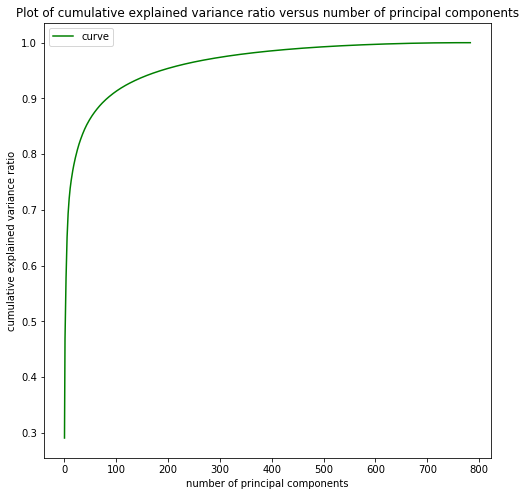

In [155]:
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="green", label='curve')
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance ratio')
plt.title('Plot of cumulative explained variance ratio versus number of principal components')
plt.legend(loc='best')
plt.savefig('Cumvar.png')
plt.show()

In [156]:
pca.explained_variance_ratio_[:5]

array([0.29039228, 0.1775531 , 0.06019222, 0.04957428, 0.03847655])

In [157]:
pca.components_[:10]

array([[ 1.76521515e-07,  2.44768364e-06,  1.67354171e-05, ...,
         1.06623293e-03,  1.14054578e-04,  1.30759064e-05],
       [-2.00777633e-07,  3.25916172e-06,  7.20161624e-06, ...,
         2.38633309e-03,  7.40179648e-04,  6.89874688e-05],
       [ 5.67039716e-07, -5.64584997e-07,  1.13361831e-05, ...,
        -5.54570529e-04, -9.14299655e-04, -7.12402066e-05],
       ...,
       [ 7.96399776e-07,  3.31472541e-06,  4.23611695e-06, ...,
        -9.00707561e-03, -3.09066200e-03, -1.67971183e-04],
       [ 3.20740323e-06, -1.77171932e-07, -2.84972172e-05, ...,
        -4.34921352e-03, -8.52681760e-04, -5.86079588e-05],
       [ 3.09672995e-06,  1.14493549e-05,  2.60950961e-05, ...,
         2.58620239e-03,  2.93577497e-03,  3.00184578e-04]])

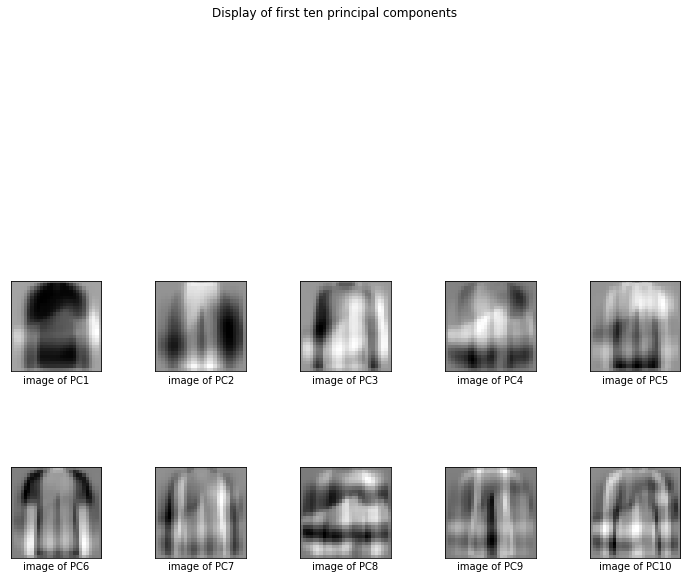

In [158]:
fig, axs = plt.subplots(2,5, figsize=(12,12), sharey=True, sharex=True, subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=-0.6, wspace=0.6))
fig.suptitle('Display of first ten principal components')
for i in range(5):
    axs[0,i].imshow(pca.components_[i].reshape(28,28), cmap=plt.get_cmap('gray_r'))
    axs[0,i].set(xlabel='image of PC'+ str(i+1))
for i in range(5):
    axs[1,i].imshow(pca.components_[5+i].reshape(28,28), cmap=plt.get_cmap('gray_r'))
    axs[1,i].set(xlabel='image of PC'+ str(6+i))
plt.savefig('principal_components_images.png')
plt.show()

In [159]:
class_samples = np.zeros((10,784))

In [160]:
for i in range(10):
    class_samples[i] = Xtrn_nm[Ytrn_cat == (i+1)][0]

In [161]:
Ks = [5, 20, 50, 200]

In [162]:
from sklearn.metrics import mean_squared_error

In [163]:
rmse = np.zeros((10,4))

In [164]:
rec_samples = np.zeros((10,4,784))

In [165]:
pca2 = PCA().fit(Xtrn_nm)
for i in range(10):
    x = class_samples[i]
    for k in range(len(Ks)):
        x_ = np.zeros((784,))
        # reconstruct using principal components
        for j in range(Ks[k]):
            x_ = x_ + np.inner(x, pca2.components_[j])*pca2.components_[j]
        # compute root mean squared error
        rec_samples[i,k] = x_ + Xmean_trn
        rmse[i,k] = np.sqrt(mean_squared_error(x, x_))

In [166]:
rmse

array([[0.25614866, 0.15000682, 0.12761144, 0.06009258],
       [0.1980244 , 0.14043966, 0.09507974, 0.03541976],
       [0.19870016, 0.14561728, 0.12340082, 0.07828281],
       [0.14565798, 0.10725657, 0.08342968, 0.05604424],
       [0.1182087 , 0.10262621, 0.08794267, 0.04637152],
       [0.18112976, 0.1586612 , 0.14277478, 0.09011229],
       [0.12947928, 0.09583237, 0.07227577, 0.04581635],
       [0.16562538, 0.12782401, 0.10661942, 0.06217125],
       [0.22339659, 0.14496876, 0.12362768, 0.09217217],
       [0.18351042, 0.15108848, 0.12193132, 0.07279154]])

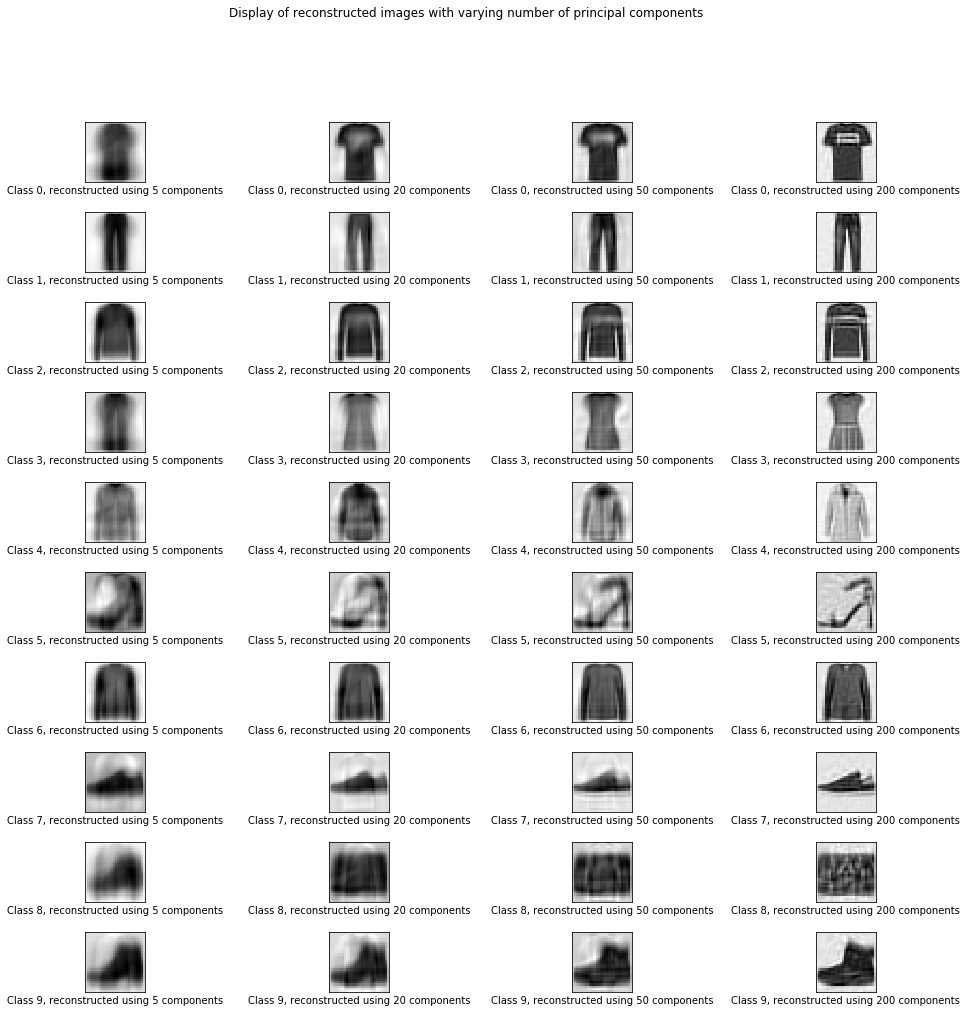

In [167]:
fig, axs = plt.subplots(10,4, figsize=(16,16), sharey=True, sharex=True, subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.5, wspace=0.5))
fig.suptitle('Display of reconstructed images with varying number of principal components')
for i in range(10):
    axs[i,0].imshow(rec_samples[i,0].reshape(28,28), cmap=plt.get_cmap('gray_r'))
    axs[i,0].set(xlabel='Class '+str(i)+', reconstructed using 5 components')
    axs[i,1].imshow(rec_samples[i,1].reshape(28,28), cmap=plt.get_cmap('gray_r'))
    axs[i,1].set(xlabel='Class '+str(i)+', reconstructed using 20 components')
    axs[i,2].imshow(rec_samples[i,2].reshape(28,28), cmap=plt.get_cmap('gray_r'))
    axs[i,2].set(xlabel='Class '+str(i)+', reconstructed using 50 components')
    axs[i,3].imshow(rec_samples[i,3].reshape(28,28), cmap=plt.get_cmap('gray_r'))
    axs[i,3].set(xlabel='Class '+str(i)+', reconstructed using 200 components')
plt.savefig('img_reconstructed_vectors.png')
plt.show()

In [168]:
Xtrn_nm_2d = PCA(n_components=2, random_state=1000).fit_transform(Xtrn_nm)

In [169]:
Xtrn_nm_2d[0]

array([-0.48625016,  6.40421332])

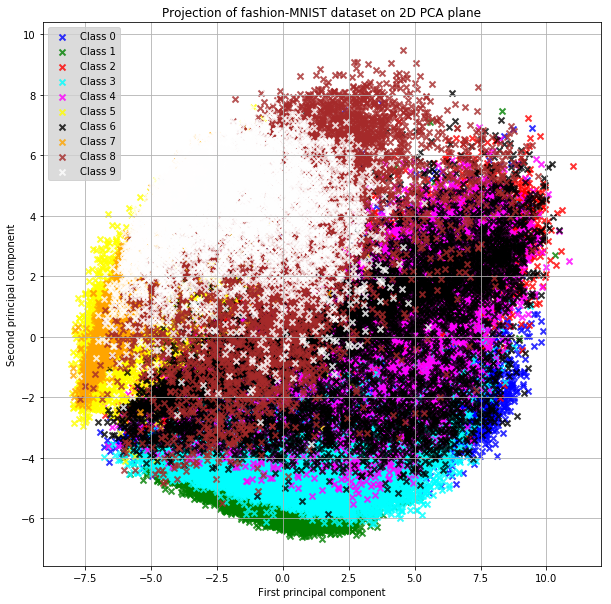

In [170]:
plt.figure(figsize=(10,10))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'brown', 'white']
target_names = ['Class 0','Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9']
lw = 2

for color, i, target_name in zip(colors, [0,1,2,3,4,5,6,7,8,9], target_names):
    plt.scatter(Xtrn_nm_2d[Ytrn == i, 0], Xtrn_nm_2d[Ytrn == i, 1], marker='x', color=color, alpha=.8, lw=lw,
                label=target_name, cmap=plt.get_cmap('coolwarm'))
plt.legend(loc='best',shadow=False, facecolor='lightgray', scatterpoints=1)
plt.grid(True)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Projection of fashion-MNIST dataset on 2D PCA plane')
plt.savefig('2d_pca.png')
plt.show()

In [5]:
import sys
import os

In [6]:
helpers_path = os.path.join(os.getcwd(),'helpers')
helpers_path

'/Users/Hoffmann/Downloads/iaml-cw2/helpers'

In [9]:
sys.path.append(helpers_path)

In [10]:
sys.path

['/Users/Hoffmann/Downloads/iaml-cw2',
 '/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python37.zip',
 '/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7',
 '/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7/lib-dynload',
 '',
 '/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7/site-packages',
 '/Users/Hoffmann/miniconda3/envs/py3iaml/lib/python3.7/site-packages/IPython/extensions',
 '/Users/Hoffmann/.ipython',
 '/Users/Hoffmann/Downloads/iaml-cw2/helpers']

In [11]:
from helpers import iaml01cw2_helpers

In [12]:
some_path = os.path.join(os.,'../')

In [15]:
os.getcwd()

'/Users/Hoffmann/Downloads/iaml-cw2'

In [16]:
os.path.dirname(os.getcwd())

'/Users/Hoffmann/Downloads'

In [ ]:
os.path.join(os.path.dirname(os.getcwd()),'')